In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras


2021-09-07 23:00:31.756376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-07 23:00:31.756444: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pathlib

#path of train datas
img_dir=r'../../datasets/balls/balls/train'
valid_dir = r'../../datasets/balls/balls/valid'
test_dir = r'../../datasets/balls/balls/test'

#PATH object
data_path = pathlib.Path(img_dir)
valid_path = pathlib.Path(valid_dir)
test_path = pathlib.Path(test_dir)

#list of classes
data_list=os.listdir(img_dir)
print (data_list)

#count images
image_count = len(list(data_path.glob('*/*.jpg')))
valid_count = len(list(valid_path.glob('*/*.jpg')))
print(image_count)
print(valid_count)

['volley ball', 'paint balls', 'water polo ball', 'cricket ball', 'billiard ball', 'basketball', 'puffballs', 'screwballs', 'buckeyballs', 'wiffle ball', 'marble', 'beachballs', 'soccer ball', 'golf ball', 'wrecking ball', 'tennis ball', 'baseball', 'medicine ball', 'eyeballs', 'football', 'meat ball', 'bowling ball', 'cannon ball', 'brass']
2860
120


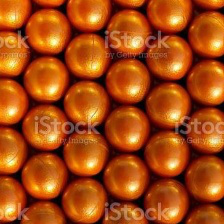

In [3]:
#examples of paint boll

paint_bolls = list(data_path.glob('paint balls/*'))
PIL.Image.open(str(paint_bolls[0]))





In [4]:
#define some constant
BATCH_SIZE = 32
HEIGHT = 224
WIDTH = 224




In [7]:
#load train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split= 0.2,
    subset="training",
    seed= 123,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE

)




Found 2860 files belonging to 24 classes.
Using 2288 files for training.


In [8]:
#load validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path, #cat use 'valid_path'
    validation_split= 0.2,
    subset="validation",
    seed= 123,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE

)







Found 2860 files belonging to 24 classes.
Using 572 files for validation.


In [9]:
#load test dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE
    )




Found 108 files belonging to 24 classes.


In [10]:
#find class names

class_names = train_ds.class_names
num_classes = len(class_names)
print(num_classes)
print(class_names)

24
['baseball', 'basketball', 'beachballs', 'billiard ball', 'bowling ball', 'brass', 'buckeyballs', 'cannon ball', 'cricket ball', 'eyeballs', 'football', 'golf ball', 'marble', 'meat ball', 'medicine ball', 'paint balls', 'puffballs', 'screwballs', 'soccer ball', 'tennis ball', 'volley ball', 'water polo ball', 'wiffle ball', 'wrecking ball']


2021-09-07 23:01:10.901525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 224, 224, 3)
(32,)


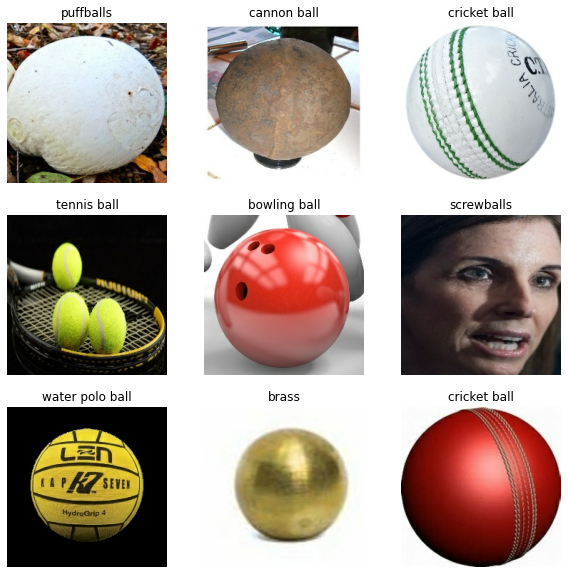

In [11]:
#visualize the data

plt.figure(figsize= (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break





In [12]:
#configure the dataset for perfomance
#Dataset.cache()
#Dataset.prefetch()


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)



In [13]:
#Standardize the data


#The RGB channel values are in the [0, 255] range.
#This is not ideal for a neural network; in general
#you should seek to make your input values small. Here,
#you will standardize values to be in the [0, 1] range by
#using a Rescaling layer



normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
print(normalization_layer)




In [15]:
#Create the model

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(HEIGHT, WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


2021-09-04 23:10:54.956062: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25690112 exceeds 10% of free system memory.
2021-09-04 23:10:54.980549: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25690112 exceeds 10% of free system memory.
2021-09-04 23:10:54.986479: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25690112 exceeds 10% of free system memory.


In [16]:
#compile the model

model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics= ['accuracy']
    
)



In [17]:
#model summary :)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [20]:
#train the model

EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs = EPOCHS


)



Epoch 1/10
72/72 [==============================] - 51s 639ms/step - loss: 2.6055 - accuracy: 0.2784 - val_loss: 1.9617 - val_accuracy: 0.4545
Epoch 2/10
72/72 [==============================] - 40s 558ms/step - loss: 1.4471 - accuracy: 0.6001 - val_loss: 1.6339 - val_accuracy: 0.5472
Epoch 3/10
72/72 [==============================] - 39s 544ms/step - loss: 0.8589 - accuracy: 0.7526 - val_loss: 1.4425 - val_accuracy: 0.5927
Epoch 4/10
72/72 [==============================] - 41s 563ms/step - loss: 0.4659 - accuracy: 0.8776 - val_loss: 1.6139 - val_accuracy: 0.5682
Epoch 5/10
72/72 [==============================] - 45s 629ms/step - loss: 0.2561 - accuracy: 0.9309 - val_loss: 1.8429 - val_accuracy: 0.5962
Epoch 6/10
72/72 [==============================] - 43s 589ms/step - loss: 0.1527 - accuracy: 0.9576 - val_loss: 2.1640 - val_accuracy: 0.5769
Epoch 7/10
72/72 [==============================] - 42s 583ms/step - loss: 0.1334 - accuracy: 0.9628 - val_loss: 2.5188 - val_accuracy: 0.5594

In [18]:
#visualize training results :))((

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined

In [14]:
#Data augmentation
#takes the approach of generating additional
#training data from your existing examples by 
#augmenting them using random transformations 
#that yield believable-looking images


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(HEIGHT, 
                                                              WIDTH,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)






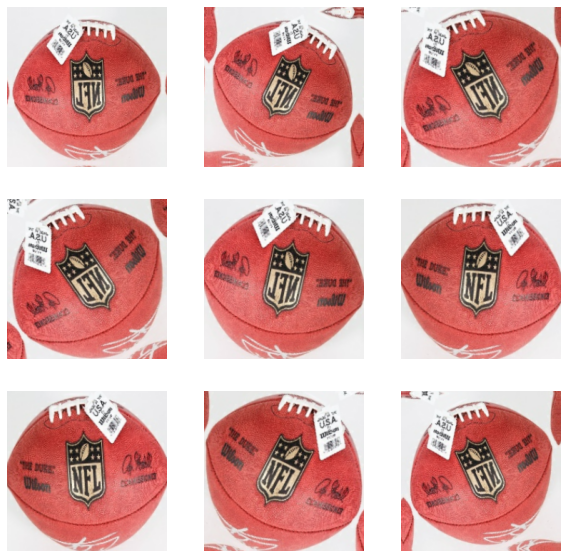

In [15]:

#let's visualize what a fwe augmented examples look 
#like by applying data ...

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
#Dropout

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
    
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

print(model)

2021-09-07 23:01:52.205102: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 6576668672 exceeds 10% of free system memory.


In [52]:
#compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)       

In [53]:
#training

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)




Epoch 1/15
72/72 [==============================] - 56s 740ms/step - loss: 3.1589 - accuracy: 0.0629 - val_loss: 3.1341 - val_accuracy: 0.0927
Epoch 2/15
72/72 [==============================] - 47s 648ms/step - loss: 3.1259 - accuracy: 0.0905 - val_loss: 3.1083 - val_accuracy: 0.1259
Epoch 3/15
72/72 [==============================] - 44s 612ms/step - loss: 3.1073 - accuracy: 0.1110 - val_loss: 3.0875 - val_accuracy: 0.1311
Epoch 4/15
72/72 [==============================] - 44s 607ms/step - loss: 3.0835 - accuracy: 0.1219 - val_loss: 3.0899 - val_accuracy: 0.1154
Epoch 5/15
72/72 [==============================] - 44s 609ms/step - loss: 3.0611 - accuracy: 0.1206 - val_loss: 3.0377 - val_accuracy: 0.1573
Epoch 6/15
72/72 [==============================] - 44s 611ms/step - loss: 3.0466 - accuracy: 0.1215 - val_loss: 3.0382 - val_accuracy: 0.1119
Epoch 7/15
72/72 [==============================] - 44s 610ms/step - loss: 3.0234 - accuracy: 0.1311 - val_loss: 3.0256 - val_accuracy: 0.1311

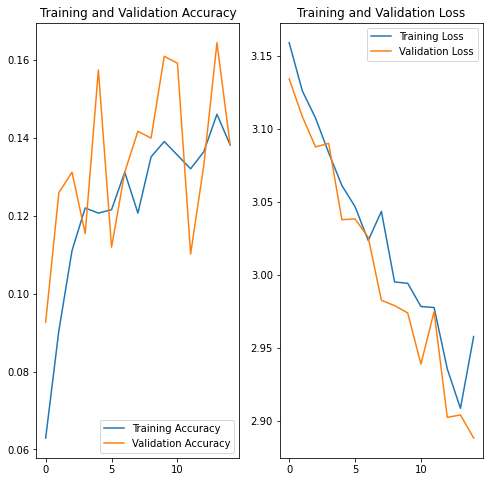

In [54]:
#Visualize training results 


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(23, shape=(), dtype=int32)
wrecking ball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tensor(0, shape=(), dtype=int32)
baseball
tf.Tens

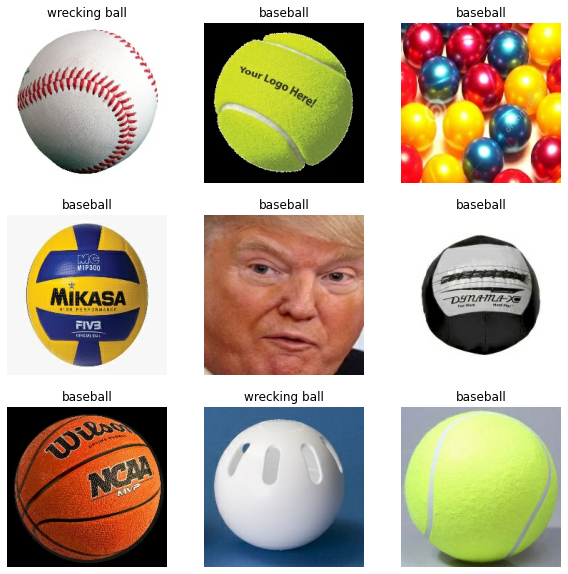

In [56]:
#predict test data



test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

#Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
#print(image_batch)
#print(label_batch)
#plt.imshow(image_batch[1].astype("uint8"))

predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 23)

for i in range(100):
    print(predictions[i])
    print(class_names[predictions[i]])

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")